In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
def save_data(data, outfile):
    with open(outfile, 'wb') as outf:
        pickle.dump(data, outf)

def load_data(infile):
    with open(infile, 'rb') as inf:
        data = pickle.load(inf)
    return data

In [3]:
x_train,y_train=load_data('train_merge_data_statistics.pkl')

In [4]:
x_train = x_train.replace({'ncRNA_splicing':0})
af_cut_off=0.005
x_train.loc[x_train['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
x_train.loc[x_train['gnomad_genome_controls_AF_popmax']<=af_cut_off,'AF']=1
x_train = x_train.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
x_train = x_train.drop(['Func','ExonicFunc'], axis=1) 

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(learning_rate=0.15, min_impurity_decrease=0,
                           min_samples_leaf=0.01, min_weight_fraction_leaf=0,
                           random_state=123, subsample=1)


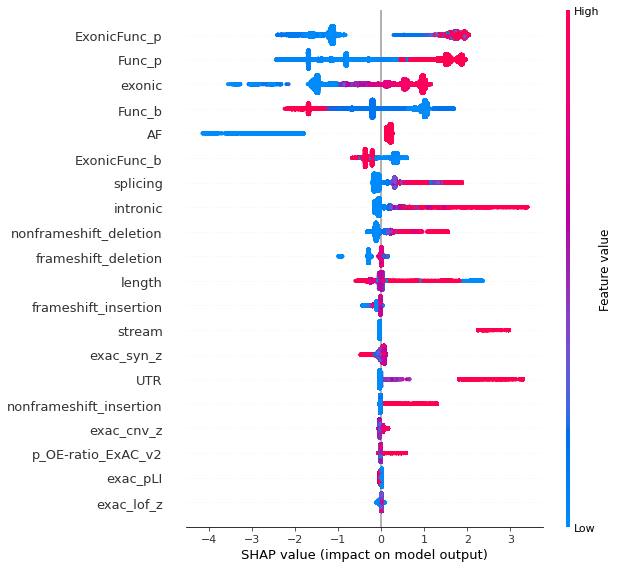

In [6]:
import shap
clf.fit(x_train,y_train)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_train)
#shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train)

In [7]:
shap_df=pd.DataFrame()
shap_df['feature']=x_train.columns.to_list()
shap_df['importance']=np.mean(np.abs(shap_values),axis=0)
shap_df=shap_df.sort_values(by=['importance'],ascending=False)

In [8]:
shap_df

,feature,importance
29,ExonicFunc_p,1.494063
27,Func_p,1.399403
1,exonic,0.978229
26,Func_b,0.972366
30,AF,0.363352
28,ExonicFunc_b,0.297335
6,splicing,0.199858
4,intronic,0.183388
10,nonframeshift_deletion,0.161173
8,frameshift_deletion,0.126682


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.ticker import FormatStrFormatter

font_size = 10
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400,'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size} # 'figure.figsize':(11.7/1.5,8.27/1.5)

sns.set(style='ticks',rc=rc) 
sns.set_context("paper")
# sns.palplot(sns.color_palette(flatui))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

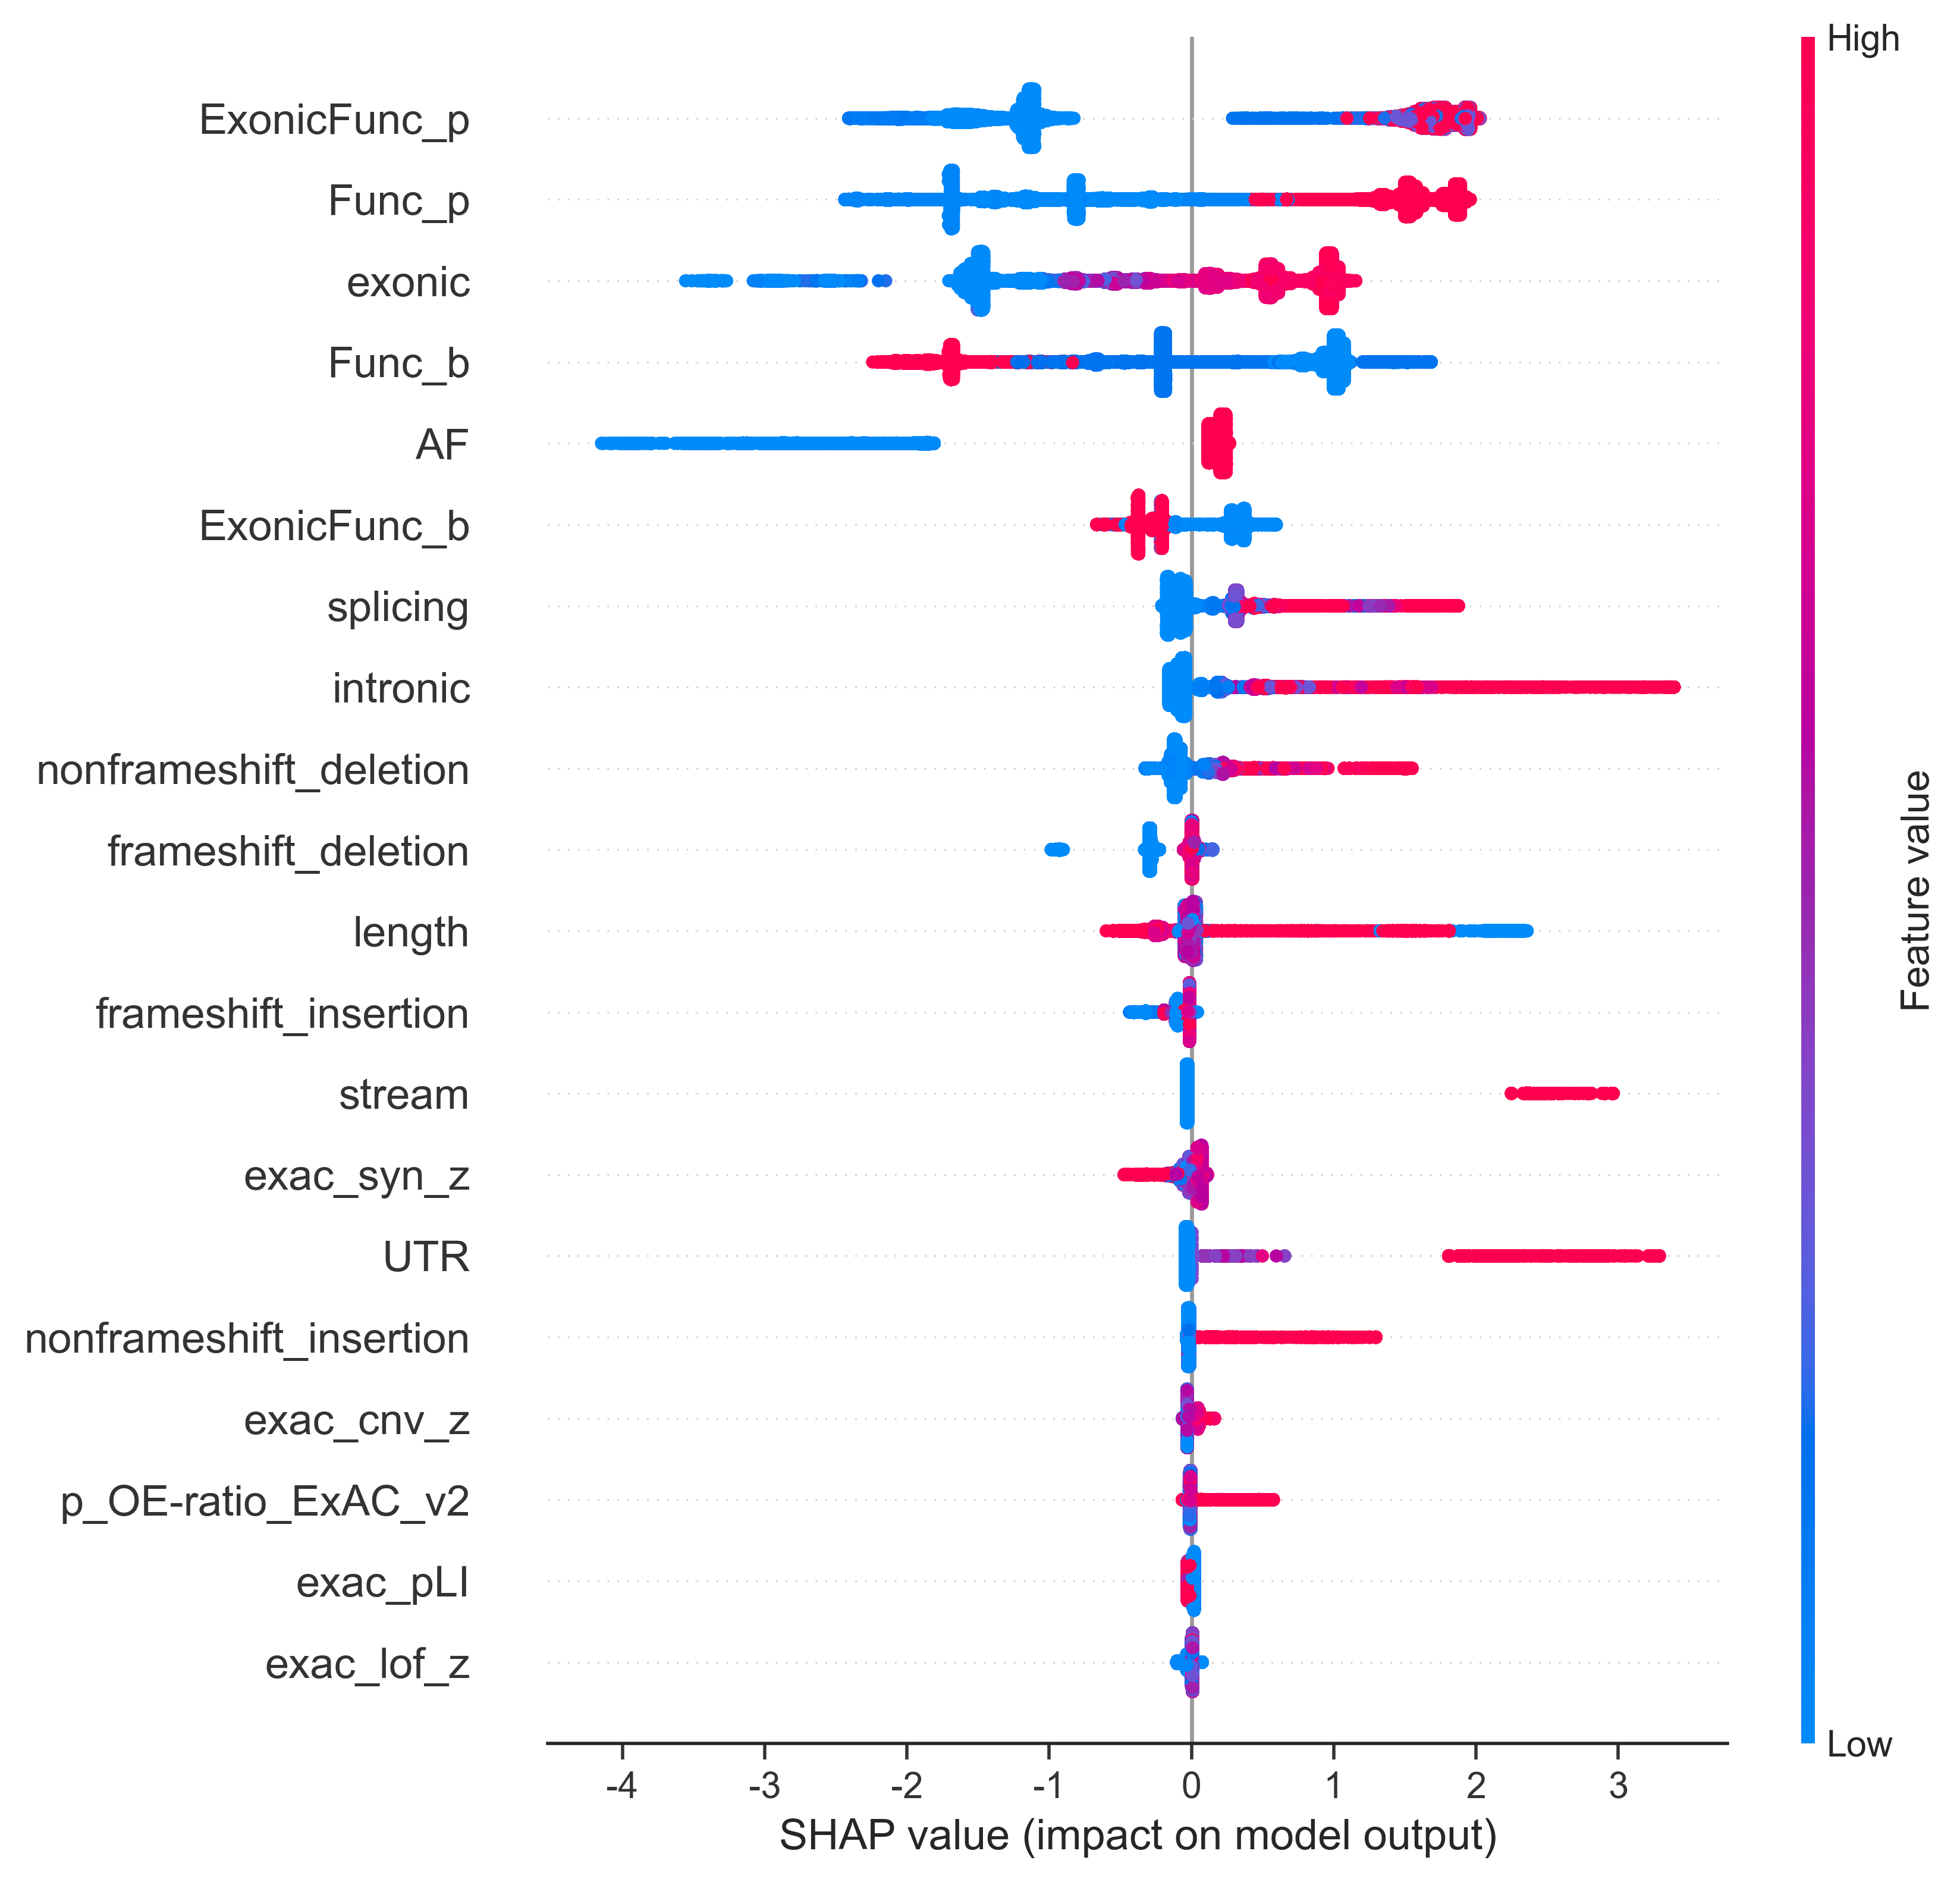

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# fig, axs = plt.subplots(1,1,figsize=(3.5,3.5))
fig=shap.summary_plot(shap_values, x_train,show=False)
plt.savefig("Fig20220315/sFig_feature_importance.pdf", dpi=400, bbox_inches='tight', pad_inches = 0.)

In [ ]:
# fig = shap.summary_plot(shap_values, train, show=False)
# plt.savefig('shap.png')